In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [49]:
df = pd.read_csv('../data/SBER_250914_250915.csv', sep=';')

df["date_str"]=df["<DATE>"].apply(lambda x: str(x).zfill(6)).astype(str)
df["time_str"]=df["<TIME>"].apply(lambda x: str(x).zfill(6)).astype(str)
df["datetime_str"]=df["date_str"]+df["time_str"]
df["time_utc"]= pd.to_datetime(df["datetime_str"], format='%y%m%d%H%M%S', utc=True)
df = df.set_index("time_utc")
df.drop(["date_str", "time_str", "datetime_str", "<DATE>", "<TIME>"], axis=1, inplace=True)
df.rename(columns={"<OPEN>": "open", "<HIGH>": "high", "<LOW>": "low", "<CLOSE>": "close", "<VOL>": "volume"}, inplace=True)

df = df.tail(200)

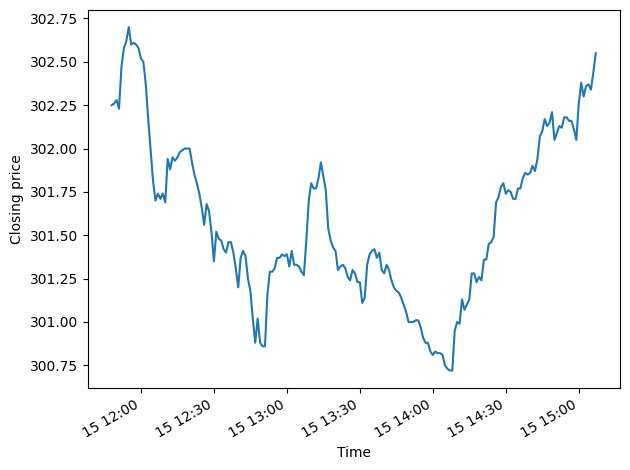

In [50]:
fig, ax = plt.subplots()
ax.plot(df.index, df['close'])
ax.set_xlabel('Time')
ax.set_ylabel('Closing price')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [51]:
# ADF
ADF_result = adfuller(df["close"])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.1345580187546442
p-value: 0.7010957172555122


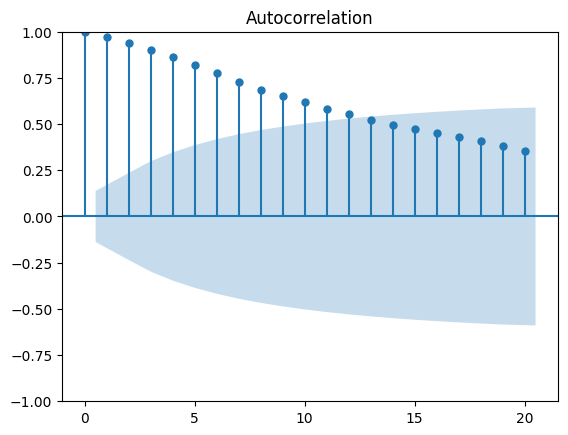

In [52]:
plot_acf(df["close"], lags=20);

In [53]:
# make stationary
diff_close = np.diff(df["close"], n=1)

ADF_result = adfuller(diff_close)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -11.364641522468768
p-value: 9.291103856028411e-21


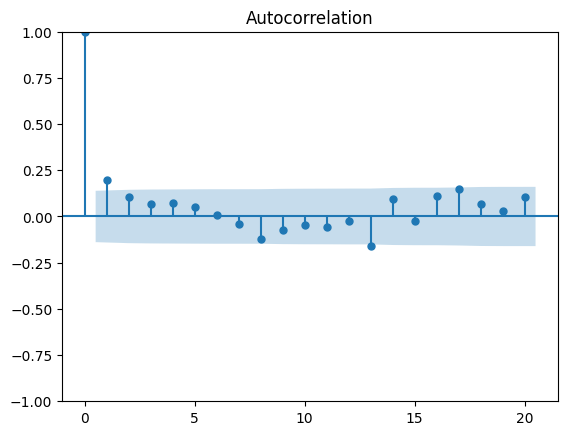

In [54]:
plot_acf(diff_close, lags=20);